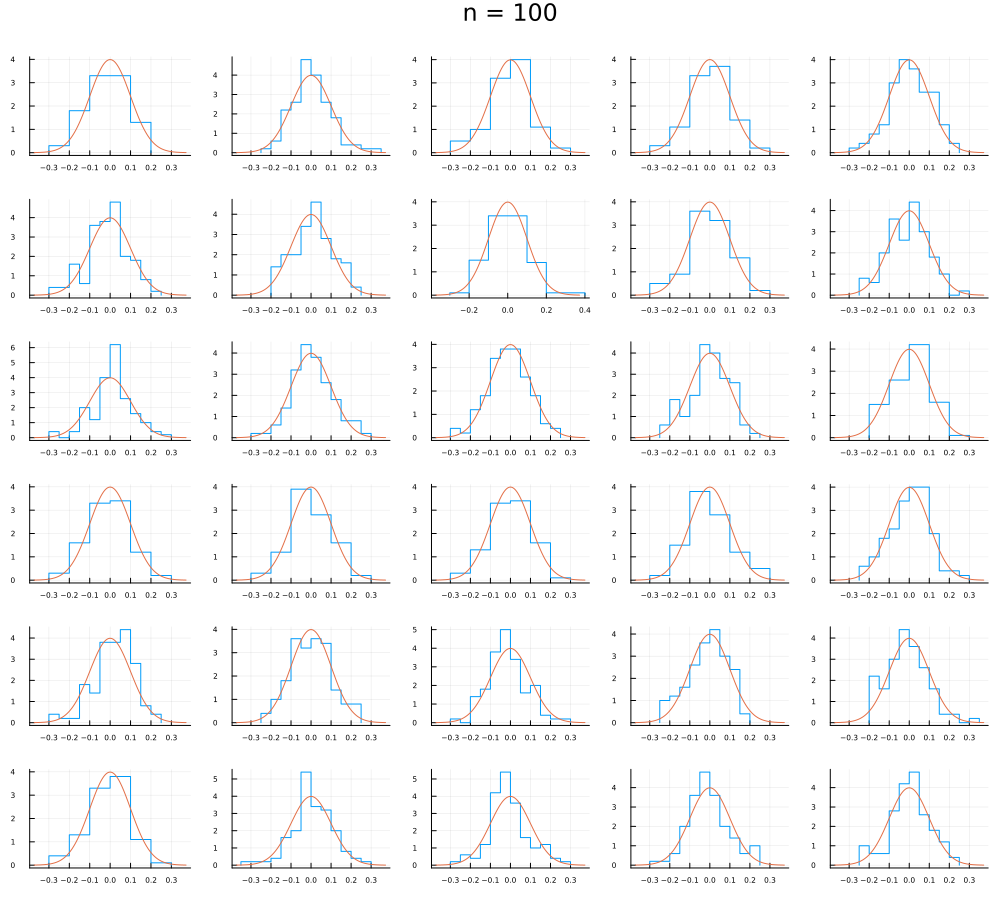

In [1]:
using Distributions
using LinearAlgebra
using StatsPlots
default(fmt=:png)

function rand_unit_sphere(n)
    x = randn(n)
    x ./= norm(x)
    x
end

function plot5x6_rand_unit_sphere(; n = 100)
    X = [rand_unit_sphere(n) for _ in 1:30]
    PP = []
    for x in X
        P = stephist(x; norm=true, label="")
        plot!(Normal(0, 1/√n), label="")
        push!(PP, P)
    end
    plot(PP...; size=(1000, 900), layout=(6, 5))
    plot!(plot_title="n = $n")
    plot!(tickfontsize=5)
end

plot5x6_rand_unit_sphere(; n = 100)

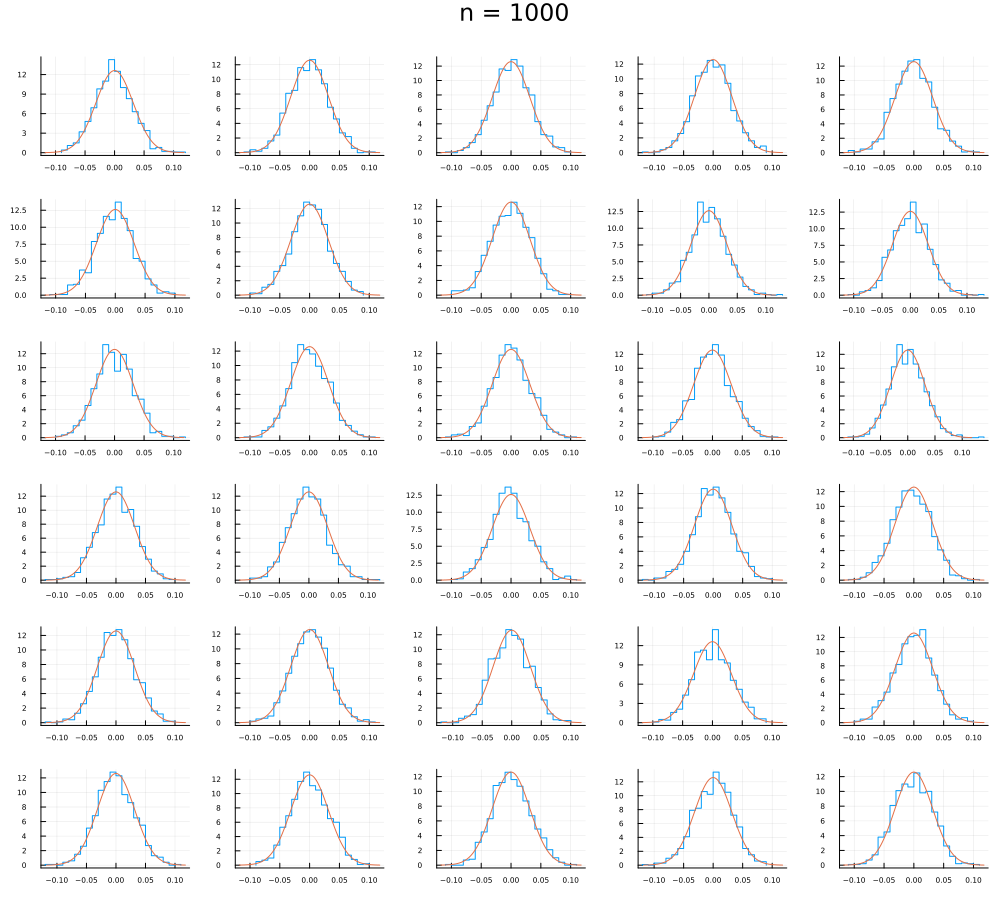

In [2]:
plot5x6_rand_unit_sphere(; n = 1000)

skewness(dist) = 2.0
kurtosis(dist) = 6.0
sum(a .^ 3) / norm(a) ^ 3 = 0.14787532923461832
sum(a .^ 4) / norm(a) ^ 4 = 0.024559844745914414


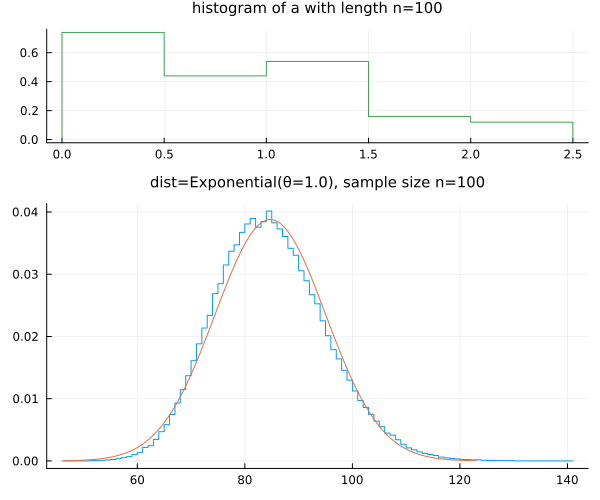

In [3]:
using Distributions
using LinearAlgebra
using Random
using StatsPlots
default(fmt=:png)

function rand_unit_sphere(n)
    x = randn(n)
    x ./= norm(x)
    x
end

function sim_sum_of_ai_Xi(dist, a; L=10^5)
    Y = zeros(L)
    Xtmp = [similar(a, eltype(dist)) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        X = rand!(dist, Xtmp[Threads.threadid()])
        Y[i] = dot(a, X)
    end
    Y
end

function plot_sum_of_ai_Xi(dist, a; L=10^5, bin=:auto)
    distname = replace(string(dist), r"{[^}]*}"=>"")
    n = length(a)
    μ = sum(a) * mean(dist)
    σ = norm(a) * std(dist)
    @show skewness(dist)
    @show kurtosis(dist)
    @show sum(a.^3) / norm(a)^3
    @show sum(a.^4) / norm(a)^4
    Y = sim_sum_of_ai_Xi(dist, a; L)
    
    P = stephist(collect(a); norm=true, bin, label="", c=3)
    title!("histogram of a with length n=$n")
    
    Q = stephist(Y; norm=true, label="")
    plot!(Normal(μ, σ), label="")
    title!("dist=$distname, sample size n=$n")
    
    plot(P, Q; size=(600, 500), layout=@layout [a{0.3h}; b])
    plot!(titlefontsize=10)
end

n = 100
plot_sum_of_ai_Xi(Exponential(), abs.(randn(n)))

skewness(dist) = 2.0
kurtosis(dist) = 6.0
sum(a .^ 3) / norm(a) ^ 3 = 0.05071175531140862
sum(a .^ 4) / norm(a) ^ 4 = 0.003054940528817851


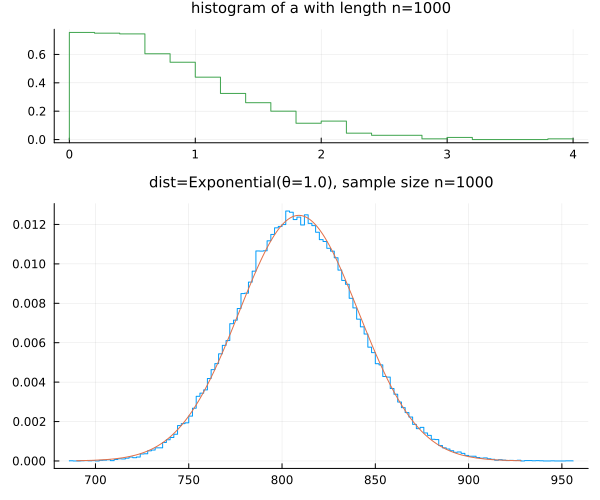

In [4]:
n = 1000
plot_sum_of_ai_Xi(Exponential(), abs.(randn(n)))

skewness(dist) = 2.0
kurtosis(dist) = 6.0
sum(a .^ 3) / norm(a) ^ 3 = 0.10000000000000003
sum(a .^ 4) / norm(a) ^ 4 = 0.01


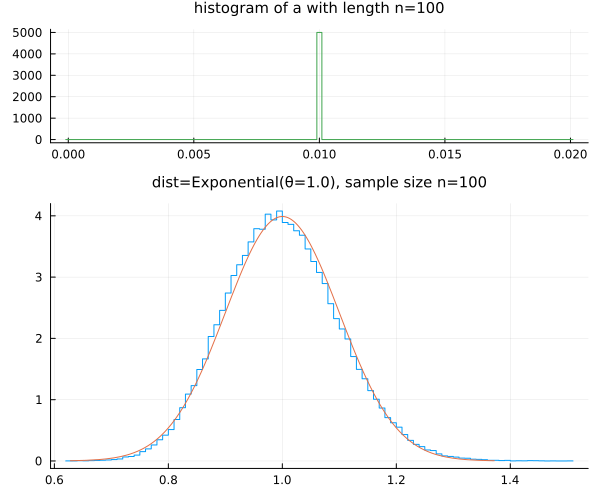

In [5]:
n = 100
plot_sum_of_ai_Xi(Exponential(), fill(1/n, n); bin=(-0.01:0.02:2.01)/n)

skewness(dist) = 2.0
kurtosis(dist) = 6.0
sum(a .^ 3) / norm(a) ^ 3 = 0.03162277660168392
sum(a .^ 4) / norm(a) ^ 4 = 0.0010000000000000057


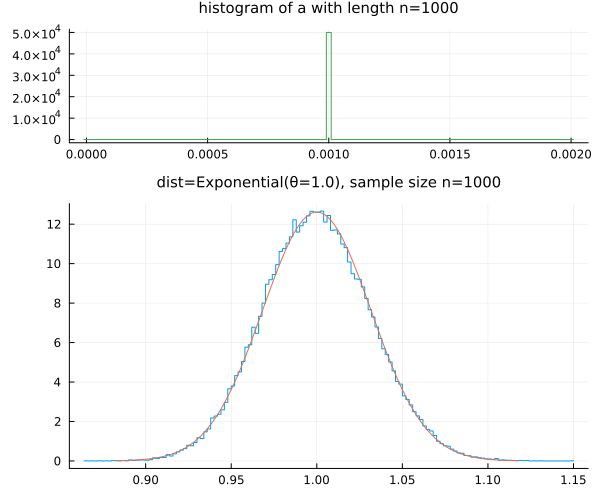

In [6]:
n = 1000
plot_sum_of_ai_Xi(Exponential(), fill(1/n, n); bin=(-0.01:0.02:2.01)/n)

skewness(dist) = 2.0
kurtosis(dist) = 6.0
sum(a .^ 3) / norm(a) ^ 3 = 0.1358789199541311
sum(a .^ 4) / norm(a) ^ 4 = 0.019582458246367583


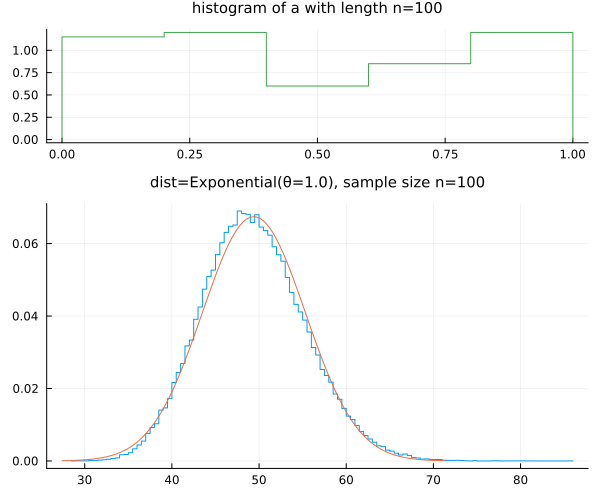

In [7]:
n = 100
plot_sum_of_ai_Xi(Exponential(), rand(n))

skewness(dist) = 2.0
kurtosis(dist) = 6.0
sum(a .^ 3) / norm(a) ^ 3 = 0.0401786864646092
sum(a .^ 4) / norm(a) ^ 4 = 0.0017162354129939268


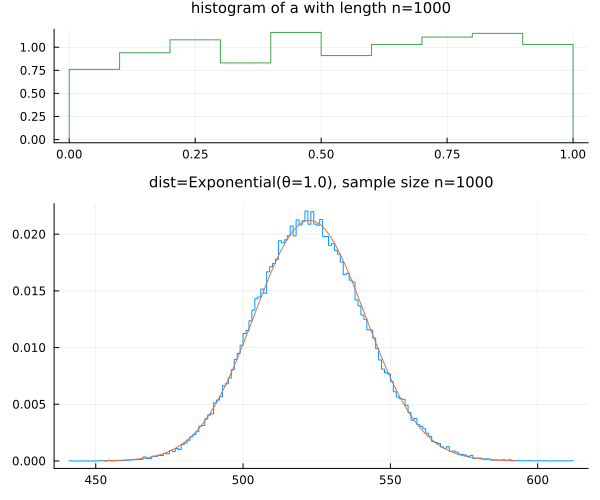

In [8]:
n = 1000
plot_sum_of_ai_Xi(Exponential(), rand(n))

skewness(dist) = 2.0
kurtosis(dist) = 6.0
sum(a .^ 3) / norm(a) ^ 3 = 0.16819611014307534
sum(a .^ 4) / norm(a) ^ 4 = 0.030632844762701377


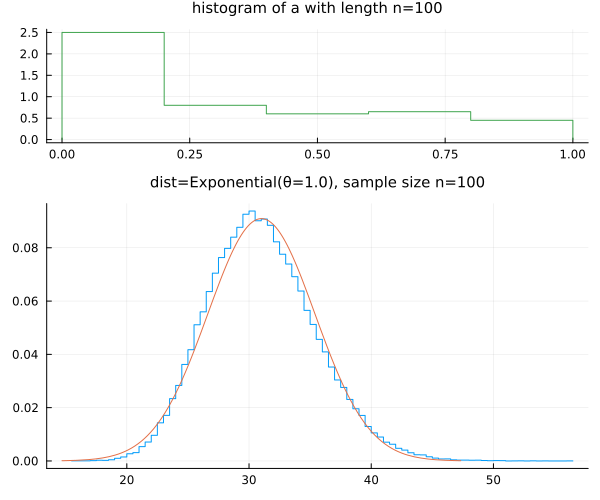

In [9]:
n = 100
plot_sum_of_ai_Xi(Exponential(), rand(n).^2)

skewness(dist) = 2.0
kurtosis(dist) = 6.0
sum(a .^ 3) / norm(a) ^ 3 = 0.04950947445745706
sum(a .^ 4) / norm(a) ^ 4 = 0.0026500265164737225


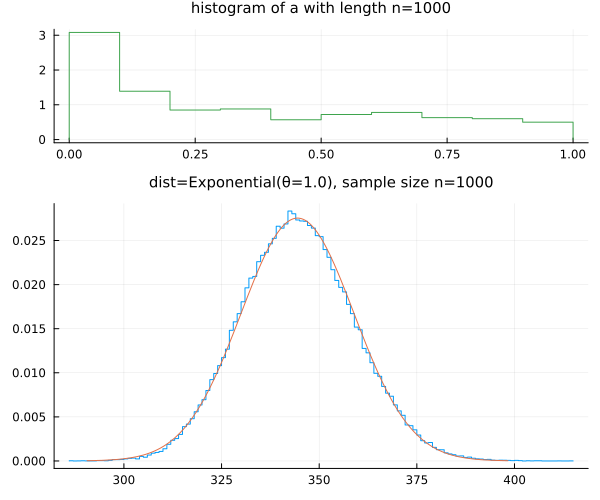

In [10]:
n = 1000
plot_sum_of_ai_Xi(Exponential(), rand(n).^2)

skewness(dist) = 2.0
kurtosis(dist) = 6.0
sum(a .^ 3) / norm(a) ^ 3 = 0.18011121365963267
sum(a .^ 4) / norm(a) ^ 4 = 0.035324735838777065


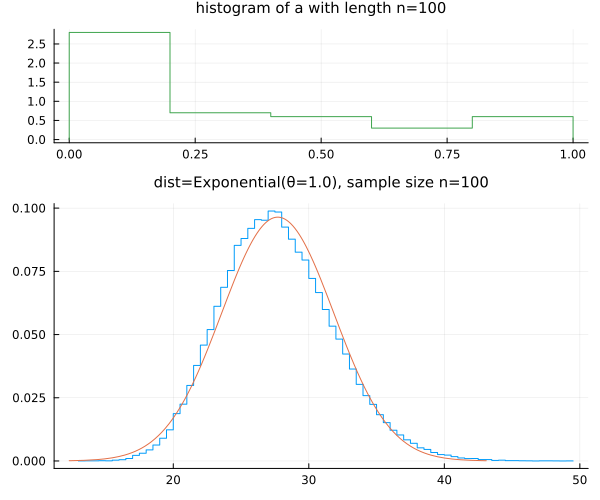

In [11]:
n = 100
plot_sum_of_ai_Xi(Exponential(), rand(n).^3)

skewness(dist) = 2.0
kurtosis(dist) = 6.0
sum(a .^ 3) / norm(a) ^ 3 = 0.05929105698072177
sum(a .^ 4) / norm(a) ^ 4 = 0.0038523867549050644


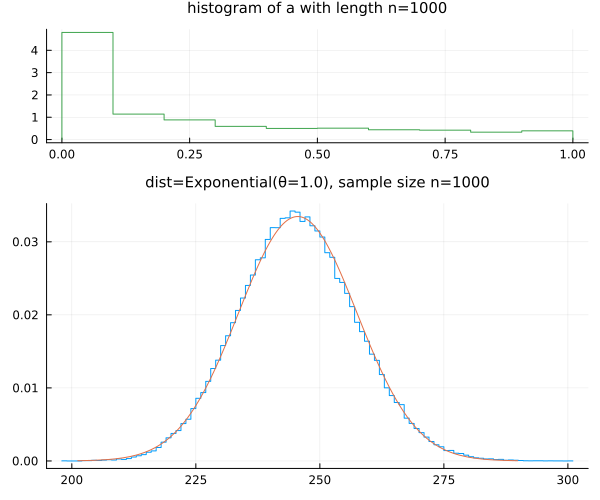

In [12]:
n = 1000
plot_sum_of_ai_Xi(Exponential(), rand(n).^3)